In [1]:
import pandas as pd
from pmdarima import auto_arima
import tool
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
train, test = tool.make_monthly_data('IndexPrices__US3601.xlsx')

In [3]:
# Prophet using all available data
US3601_train, US3601_test = tool.data_process("IndexPrices__US3601.xlsx")
US3601_train.iloc[197,0]
US3601_train = US3601_train[198:].reset_index(drop=True)
US3601_model_obj = Prophet()
US3601_forecast = tool.make_forecast(US3601_model_obj, US3601_train)
tool.timeseries_evaluation_metrics_func(US3601_train.y,US3601_forecast[:len(US3601_train)].yhat)


09:58:07 - cmdstanpy - INFO - Chain [1] start processing
09:58:07 - cmdstanpy - INFO - Chain [1] done processing


Evaluation metric results:-
MSE is : 188.6011710669701
MAE is : 10.417281049164304
RMSE is : 13.733214156451872
MAPE is : 0.14881982938407953
R2 is : 0.5120572830348604
Your model is not good enough. Please adjust it.


In [4]:
tool.timeseries_evaluation_metrics_func(US3601_test.y,US3601_forecast[len(US3601_train):].yhat)

Evaluation metric results:-
MSE is : 1358.5044538185555
MAE is : 30.01466274907283
RMSE is : 36.85789540679928
MAPE is : 0.4707356572578366
R2 is : -0.33239766123929226
Your model is not good enough. Please adjust it.


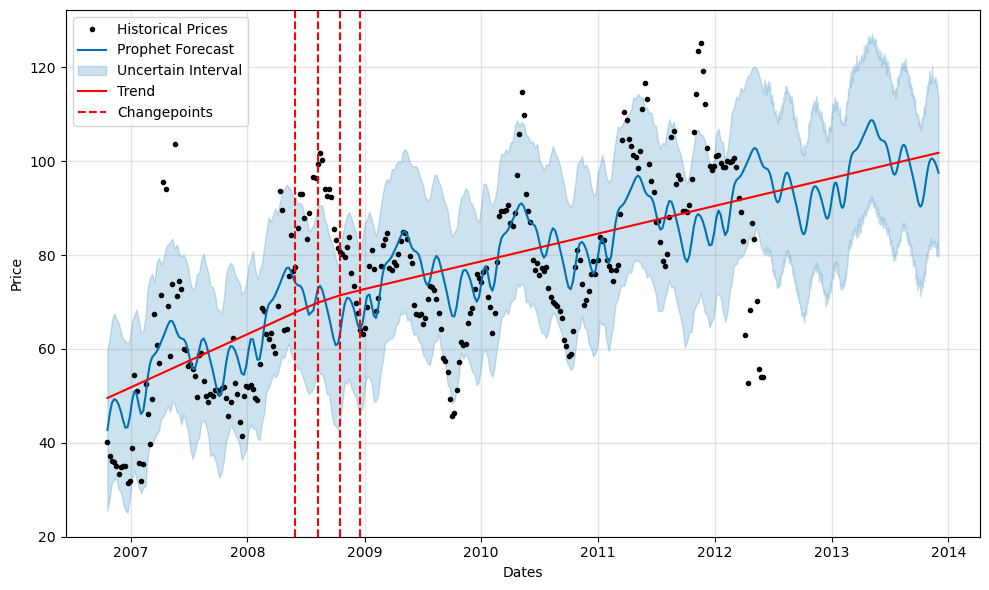

In [5]:
fig = US3601_model_obj.plot(US3601_forecast)
a = add_changepoints_to_plot(fig.gca(), US3601_model_obj, US3601_forecast)
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(["Historical Prices", "Prophet Forecast", "Uncertain Interval", "Trend", "Changepoints"],loc='upper left')